In [18]:
#Load dependencies
%matplotlib inline
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Define data files to import
btcrawdata = '../data/rawdata/btcraw.csv'
ltcrawdata = '../data/rawdata/ltcraw.csv'
ethrawdata = '../data/rawdata/ethraw.csv'
trendsrawdata = '../data/rawdata/trendsraw.csv'

#Read data files into temporary Pandas data frames
tbtcdata = pd.read_csv(btcrawdata,index_col=0,parse_dates=True)
tltcdata = pd.read_csv(ltcrawdata,index_col=0,parse_dates=True)
tethdata = pd.read_csv(ethrawdata,index_col=0,parse_dates=True)
ttrendsdata = pd.read_csv(trendsrawdata,index_col=0,parse_dates=True)

In [51]:
#Cleanup raw data files and discard all data prior to 2017
btcdata=tbtcdata.loc['2017':'2019']
ltcdata=tltcdata.loc['2017':'2019']
ethdata=tethdata.loc['2017':'2019']
trendsdata=ttrendsdata.loc['2017':'2019']

#Create dataset containing USD price of cryptocurrency
btc=btcdata[['PriceUSD']].copy()
btc.rename(columns={'PriceUSD':'bitcoin'},inplace=True)
btccount=len(btc)
ltc=ltcdata[['PriceUSD']].copy()
ltc.rename(columns={'PriceUSD':'litecoin'},inplace=True)
ltccount=len(ltc)
eth=ethdata[['PriceUSD']].copy()
eth.rename(columns={'PriceUSD':'ethereum'},inplace=True)
ethcount=len(eth)

tcrypto=pd.merge(btc,ltc,right_index=True,left_index=True,how='outer')
crypto=pd.merge(tcrypto,eth,right_index=True,left_index=True,how='outer')
cryptocount=len(crypto)

#Create columns of daily change in value of cryptocurrencies (daily close - prior daily close or open)
crypto['btcchange']=crypto['bitcoin']-crypto['bitcoin'].shift(1)
crypto['ltcchange']=crypto['litecoin']-crypto['litecoin'].shift(1)
crypto['ethchange']=crypto['ethereum']-crypto['ethereum'].shift(1)

#Delete columns of data not needed
del trendsdata['isPartial']
trendscount=len(trendsdata)

#Print out lengths of merged datasets for gut check
print(f'Bitcoin dataset contain {btccount} records')
print(f'Litecoin dataset contain {ltccount} records')
print(f'Ethereum dataset contain {ethcount} records')
print(f'Cryptocurrency dataset contain {cryptocount} records')
print(f'Google Trends dataset contain {trendscount} records')

Bitcoin dataset contain 1047 records
Litecoin dataset contain 1047 records
Ethereum dataset contain 1047 records
Cryptocurrency dataset contain 1047 records
Google Trends dataset contain 151 records


,bitcoin,litecoin,ethereum,btcchange,ltcchange,ethchange
date,,,,,,
2017-01-01,997.257358,4.475238,8.177852,NaN,NaN,NaN
2017-01-02,1017.077886,4.566941,8.378456,19.820528,0.091703,0.200605
2017-01-03,1032.609053,4.570711,9.697472,15.531167,0.003770,1.319015
2017-01-04,1134.496445,4.583539,11.068632,101.887392,0.012828,1.371161
2017-01-05,1000.498129,4.236431,10.224794,-133.998316,-0.347108,-0.843838
...,...,...,...,...,...,...
2019-11-09,8810.784562,62.166374,184.962580,19.450627,1.702587,0.924357
2019-11-10,9042.890723,63.656980,189.045105,232.106161,1.490606,4.082525
2019-11-11,8713.207930,61.696267,184.418845,-329.682793,-1.960713,-4.626259


In [47]:
#Determine correlation coefficients for Bitcoin Price USD data
tbtccorr = btcdata.corr()
btccorr=tbtccorr['PriceUSD']
btccorr

AdrActCnt          0.458479
BlkCnt             0.121121
BlkSizeByte        0.244374
BlkSizeMeanByte    0.164147
CapMVRVCur         0.115567
CapMrktCurUSD      0.998393
CapRealUSD         0.709930
DiffMean           0.424729
FeeMeanNtv         0.055916
FeeMeanUSD         0.541099
FeeMedNtv          0.033693
FeeMedUSD          0.516061
FeeTotNtv          0.127869
FeeTotUSD          0.551506
IssContNtv         0.121121
IssContPctAnn     -0.025423
IssContUSD         0.979842
IssTotNtv          0.121121
IssTotUSD          0.979842
NVTAdj             0.284902
NVTAdj90           0.425527
PriceBTC                NaN
PriceUSD           1.000000
ROI1yr             0.502921
ROI30d             0.142137
SplyCur            0.475059
TxCnt              0.117993
TxTfrCnt           0.298771
TxTfrValAdjNtv    -0.303411
TxTfrValAdjUSD     0.790624
TxTfrValMeanNtv   -0.309439
TxTfrValMeanUSD    0.667071
TxTfrValMedNtv    -0.451766
TxTfrValMedUSD     0.728211
TxTfrValNtv       -0.194463
TxTfrValUSD        0

Text(0, 0.5, 'Price (US$)')

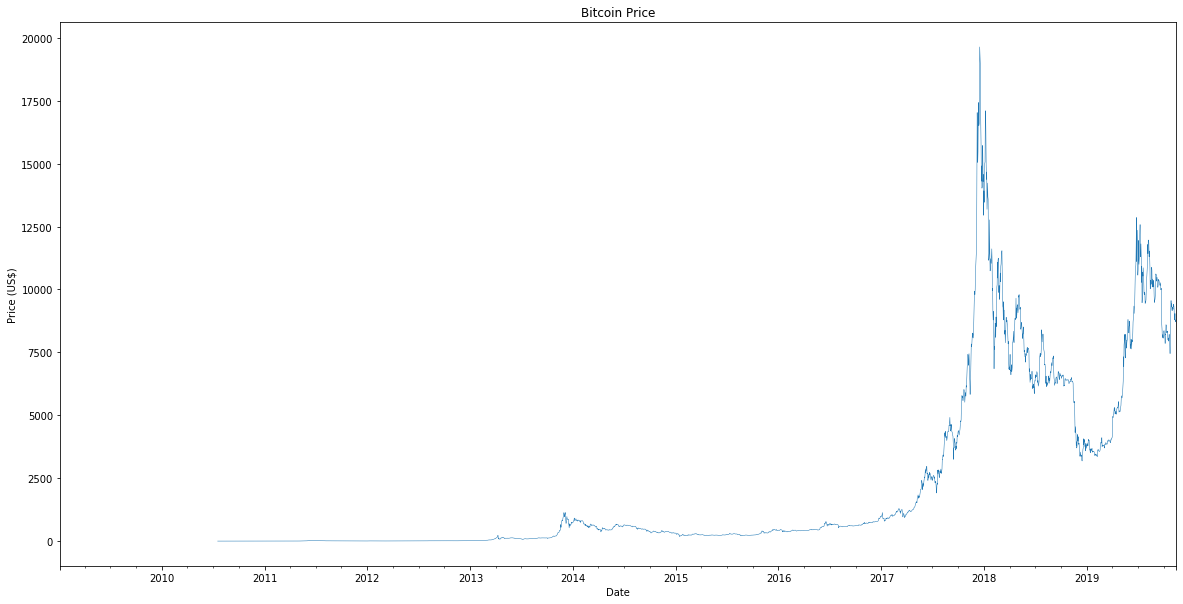

In [5]:
#Plot Bitcoin Price over time
plt.figure(figsize=(20,10)) 
btcdata['PriceUSD'].plot(linewidth=0.5)
plt.title('Bitcoin Daily Price')
plt.xlabel('Date')
plt.ylabel('Price (US$)')

Text(0, 0.5, 'Change (US$)')

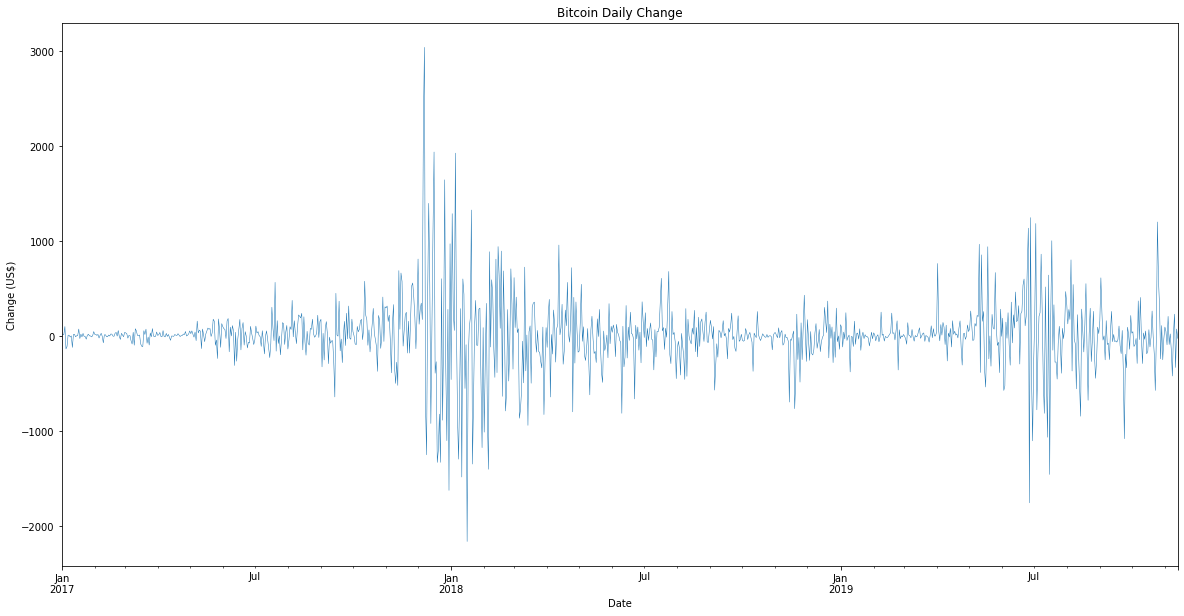

In [52]:
#Plot Bitcoin Daily Change over time
plt.figure(figsize=(20,10)) 
crypto['btcchange'].plot(linewidth=0.5)
plt.title('Bitcoin Daily Change')
plt.xlabel('Date')
plt.ylabel('Change (US$)')

In [6]:
#Determine correlation coefficients for Litecoin data
tltccorr = ltcdata.corr()
ltccorr=tltccorr['PriceUSD']
ltccorr

,AdrActCnt,BlkCnt,BlkSizeByte,BlkSizeMeanByte,CapMVRVCur,CapMrktCurUSD,CapRealUSD,DiffMean,FeeMeanNtv,FeeMeanUSD,...,TxTfrValAdjUSD,TxTfrValMeanNtv,TxTfrValMeanUSD,TxTfrValMedNtv,TxTfrValMedUSD,TxTfrValNtv,TxTfrValUSD,VtyDayRet180d,VtyDayRet30d,VtyDayRet60d
AdrActCnt,1.000000,-0.000860,0.929038,0.925744,0.296951,0.893389,0.764163,0.555417,-0.304211,0.657377,...,0.826996,-0.174666,0.221320,-0.331868,0.737109,0.142856,0.688704,0.193158,0.191879,0.191674
BlkCnt,-0.000860,1.000000,0.001510,-0.022102,0.289110,0.022211,-0.023193,-0.030928,-0.002122,0.152790,...,0.066072,0.014786,0.126097,0.224283,0.130327,0.010593,0.087077,0.109886,0.114250,0.087640
BlkSizeByte,0.929038,0.001510,1.000000,0.996435,0.269181,0.832417,0.722411,0.562646,-0.242648,0.594228,...,0.758091,-0.166416,0.200193,-0.337915,0.672949,0.125826,0.622944,0.144064,0.167341,0.158316
BlkSizeMeanByte,0.925744,-0.022102,0.996435,1.000000,0.251485,0.826084,0.727927,0.572531,-0.244308,0.581023,...,0.747976,-0.168795,0.189248,-0.340013,0.660207,0.118951,0.612329,0.136198,0.160742,0.152604
CapMVRVCur,0.296951,0.289110,0.269181,0.251485,1.000000,0.306565,0.037537,-0.011634,0.384051,0.622807,...,0.399223,0.093112,0.455108,0.402596,0.542390,0.321770,0.426535,0.462973,0.590143,0.582734
CapMrktCurUSD,0.893389,0.022211,0.832417,0.826084,0.306565,1.000000,0.827913,0.659417,-0.276044,0.616309,...,0.749871,-0.264791,0.181902,-0.252490,0.598501,-0.004576,0.557572,0.178811,0.134018,0.148740
CapRealUSD,0.764163,-0.023193,0.722411,0.727927,0.037537,0.827913,1.000000,0.879634,-0.339302,0.310503,...,0.405301,-0.270071,0.007181,-0.367790,0.278689,-0.060164,0.232723,0.021535,-0.022186,-0.010956
DiffMean,0.555417,-0.030928,0.562646,0.572531,-0.011634,0.659417,0.879634,1.000000,-0.280898,0.088764,...,0.205887,-0.262256,-0.053497,-0.304080,0.079654,-0.116548,0.064931,-0.086801,-0.082870,-0.093336
FeeMeanNtv,-0.304211,-0.002122,-0.242648,-0.244308,0.384051,-0.276044,-0.339302,-0.280898,1.000000,0.220904,...,-0.151110,-0.033780,-0.066843,0.529754,-0.036207,-0.152289,-0.099871,0.008444,0.357727,0.272081
FeeMeanUSD,0.657377,0.152790,0.594228,0.581023,0.622807,0.616309,0.310503,0.088764,0.220904,1.000000,...,0.696631,0.003602,0.452732,0.123297,0.733747,0.279654,0.700914,0.334617,0.488481,0.426744


Text(0, 0.5, 'Price (US$)')

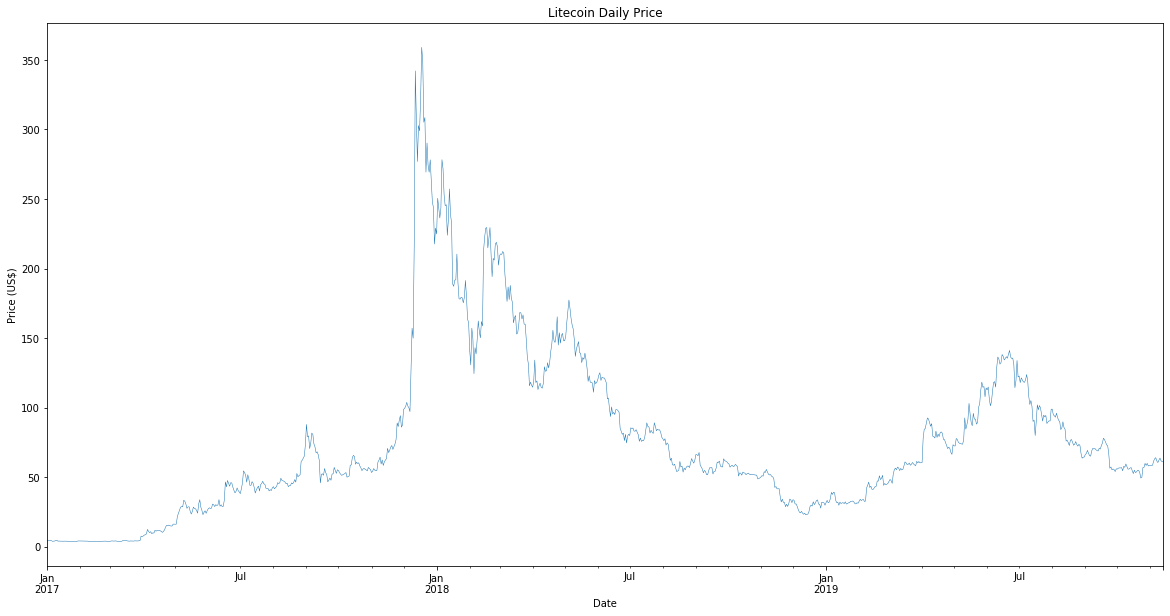

In [56]:
#Plot Litecoin Price over time
plt.figure(figsize=(20,10)) 
ltcdata['PriceUSD'].plot(linewidth=0.5)
plt.title('Litecoin Daily Price')
plt.xlabel('Date')
plt.ylabel('Price (US$)')

Text(0, 0.5, 'Change (US$)')

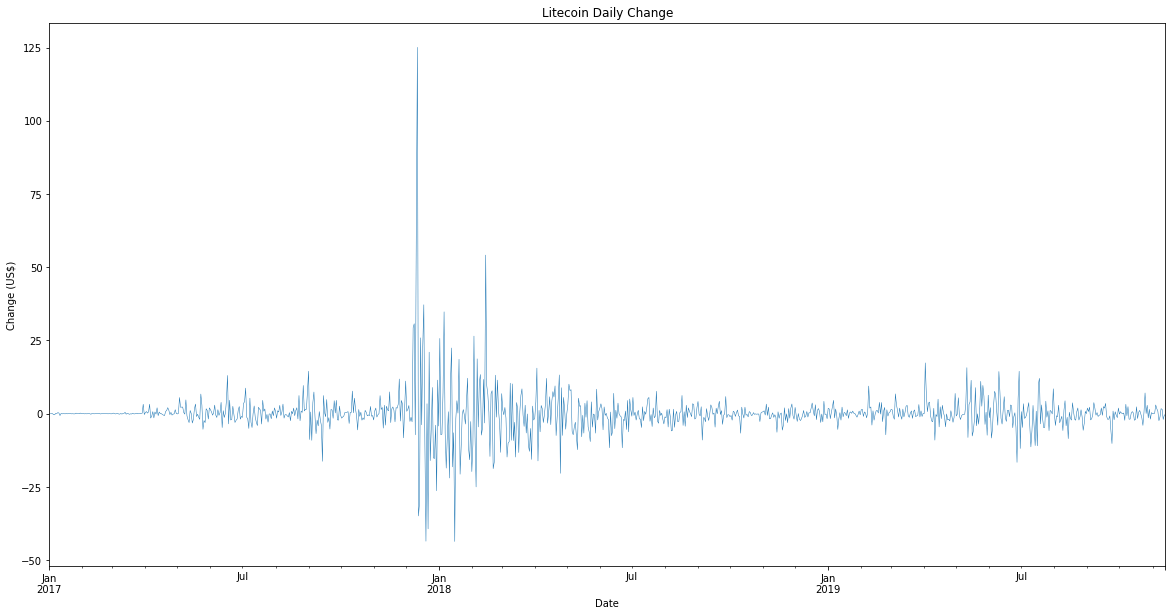

In [53]:
#Plot Litecoin Daily Change over time
plt.figure(figsize=(20,10)) 
crypto['ltcchange'].plot(linewidth=0.5)
plt.title('Litecoin Daily Change')
plt.xlabel('Date')
plt.ylabel('Change (US$)')

In [8]:
#Determine correlation coefficients for Ethereum data
tethcorr = ethdata.corr()
ethcorr=tethcorr['PriceUSD']
ethcorr

,AdrActCnt,BlkCnt,BlkSizeByte,BlkSizeMeanByte,CapMrktCurUSD,DiffMean,FeeMeanNtv,FeeMeanUSD,FeeMedNtv,FeeMedUSD,...,TxTfrValAdjUSD,TxTfrValMeanNtv,TxTfrValMeanUSD,TxTfrValMedNtv,TxTfrValMedUSD,TxTfrValNtv,TxTfrValUSD,VtyDayRet180d,VtyDayRet30d,VtyDayRet60d
AdrActCnt,1.000000,0.144289,0.380734,0.376565,0.339268,0.336236,-0.038198,0.223331,-0.077033,0.233472,...,0.271786,-0.101645,0.058036,-0.228047,0.205835,0.013886,0.196225,-0.191217,-0.224660,-0.300208
BlkCnt,0.144289,1.000000,0.313061,0.140000,0.034347,0.070423,-0.216478,-0.063230,-0.326145,-0.056789,...,-0.108090,-0.097757,-0.373815,-0.219565,-0.161183,-0.275119,-0.205110,-0.493356,-0.344803,-0.418111
BlkSizeByte,0.380734,0.313061,1.000000,0.979418,0.718757,0.883353,-0.183411,0.433935,-0.321606,0.412963,...,0.493028,-0.240237,0.094995,-0.540478,0.311564,-0.000282,0.316858,-0.528203,-0.351276,-0.445530
BlkSizeMeanByte,0.376565,0.140000,0.979418,1.000000,0.750382,0.917284,-0.170327,0.474626,-0.307614,0.452097,...,0.545475,-0.238363,0.182584,-0.544024,0.368231,0.069228,0.381777,-0.446762,-0.327784,-0.405219
CapMrktCurUSD,0.339268,0.034347,0.718757,0.750382,1.000000,0.684992,-0.066906,0.719621,-0.118242,0.720380,...,0.826705,-0.161790,0.404197,-0.379793,0.673689,0.219081,0.669024,-0.104865,-0.091366,-0.112817
DiffMean,0.336236,0.070423,0.883353,0.917284,0.684992,1.000000,-0.159562,0.404186,-0.364525,0.309126,...,0.371598,-0.233930,0.103234,-0.552709,0.184897,-0.019682,0.204263,-0.427806,-0.334710,-0.376199
FeeMeanNtv,-0.038198,-0.216478,-0.183411,-0.170327,-0.066906,-0.159562,1.000000,0.281780,0.537263,0.164319,...,0.004662,0.484556,-0.009456,0.457943,0.041990,-0.027605,0.020065,0.132641,0.130247,0.131015
FeeMeanUSD,0.223331,-0.063230,0.433935,0.474626,0.719621,0.404186,0.281780,1.000000,0.254498,0.900376,...,0.727564,-0.092979,0.360364,-0.198289,0.665647,0.228492,0.637133,-0.015382,-0.004798,-0.035040
FeeMedNtv,-0.077033,-0.326145,-0.321606,-0.307614,-0.118242,-0.364525,0.537263,0.254498,1.000000,0.279272,...,0.060084,0.143048,-0.025847,0.372965,0.126323,-0.057842,0.101929,0.233682,0.223787,0.248028
FeeMedUSD,0.233472,-0.056789,0.412963,0.452097,0.720380,0.309126,0.164319,0.900376,0.279272,1.000000,...,0.825784,-0.079546,0.392385,-0.151194,0.782452,0.271022,0.756499,-0.010082,0.028941,-0.004798


Text(0, 0.5, 'Price (US$)')

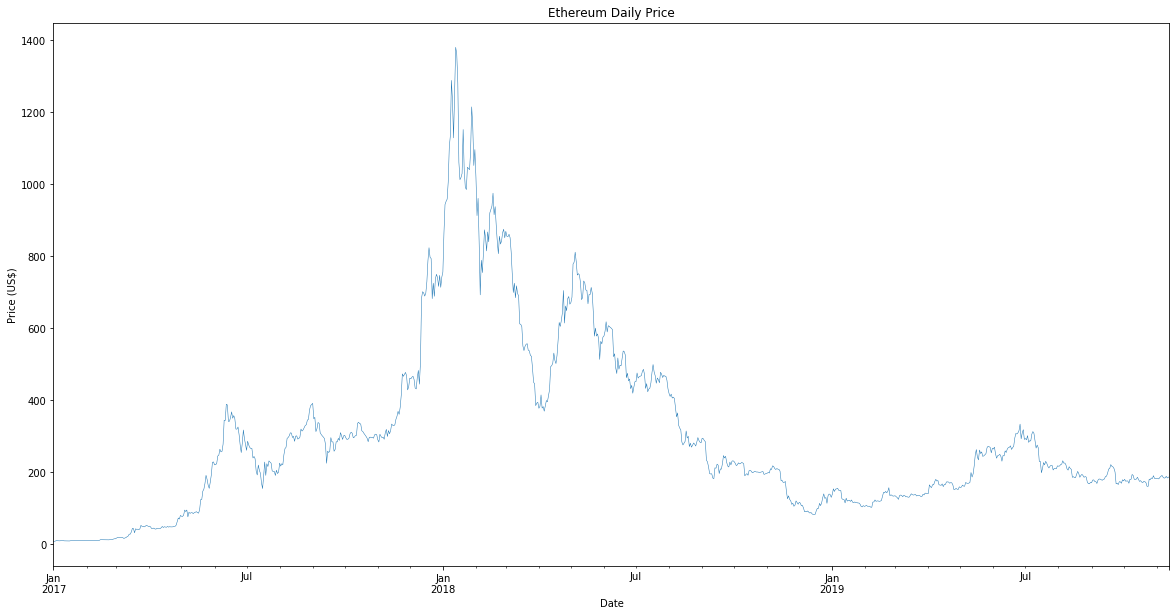

In [55]:
#Plot Ethereum Price over time
plt.figure(figsize=(20,10)) 
ethdata['PriceUSD'].plot(linewidth=0.5)
plt.title('Ethereum Daily Price')
plt.xlabel('Date')
plt.ylabel('Price (US$)')

Text(0, 0.5, 'Change (US$)')

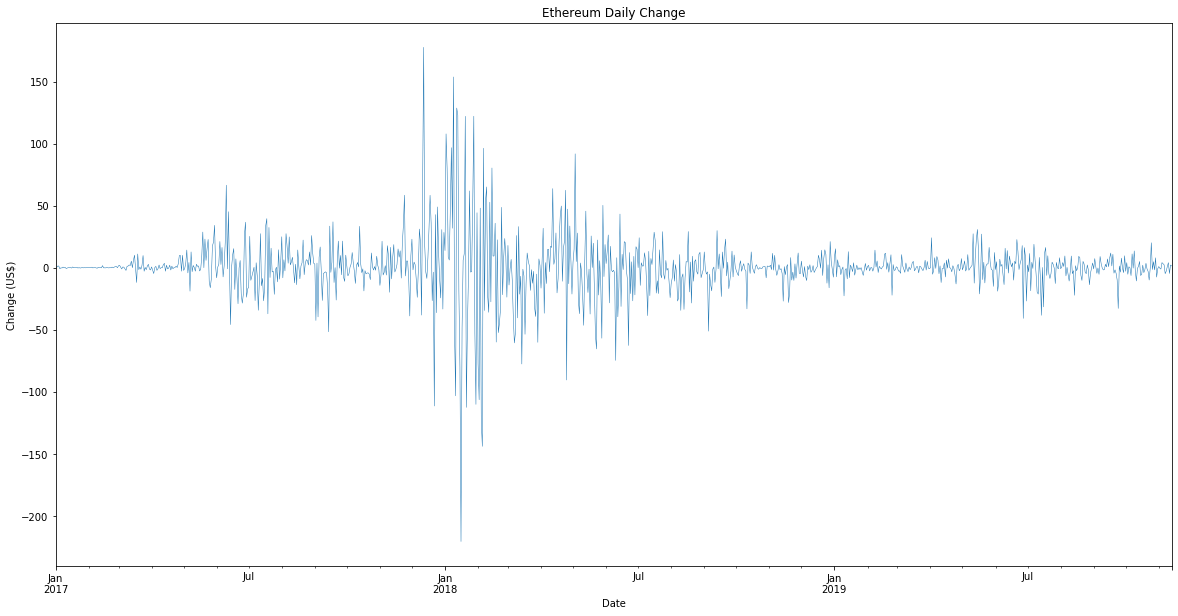

In [54]:
#Plot Ethereum Daily Change over time
plt.figure(figsize=(20,10)) 
crypto['ethchange'].plot(linewidth=0.5)
plt.title('Ethereum Daily Change')
plt.xlabel('Date')
plt.ylabel('Change (US$)')

In [10]:
#Determine correlation coefficients for Google Trends data
trendscorr = trendsdata.corr()
trendscorr

,bitcoin,litecoin,ethereum,facebook libra,cryptocurrency,isPartial
bitcoin,1.000000,0.849334,0.870125,0.030326,0.901375,-0.006719
litecoin,0.849334,1.000000,0.773074,0.024195,0.782083,-0.021847
ethereum,0.870125,0.773074,1.000000,-0.006440,0.867061,-0.006440
facebook libra,0.030326,0.024195,-0.006440,1.000000,0.036913,-0.003937
cryptocurrency,0.901375,0.782083,0.867061,0.036913,1.000000,0.000849
isPartial,-0.006719,-0.021847,-0.006440,-0.003937,0.000849,1.000000


Text(0, 0.5, 'Trend Metric')

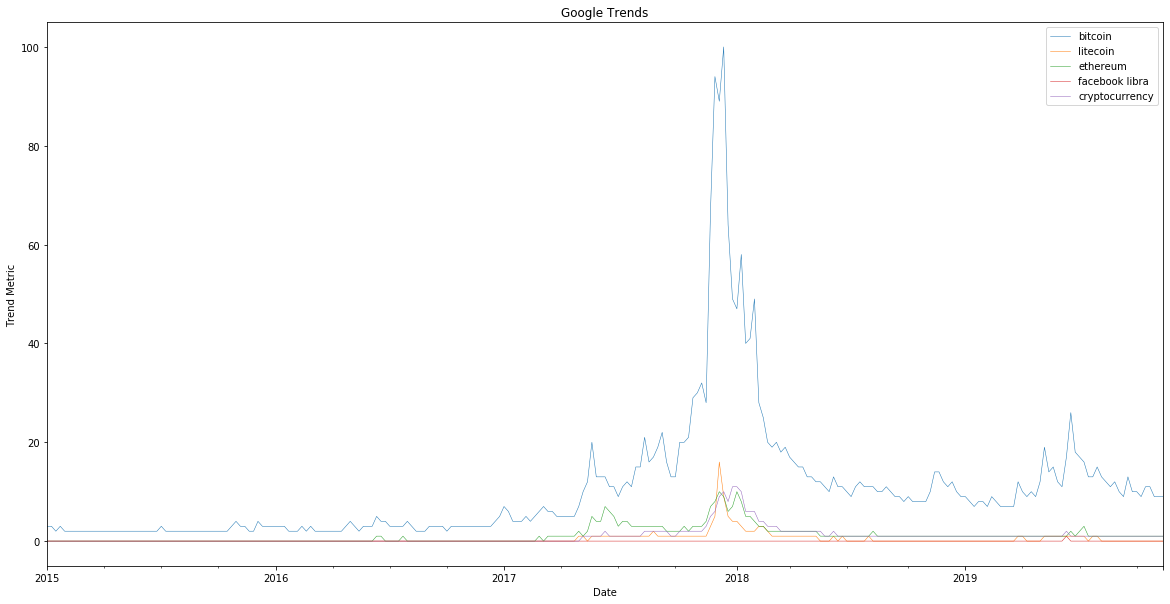

In [11]:
#Plot Google Trends over time
plt.figure(figsize=(20,10)) 
trendsdata['bitcoin'].plot(linewidth=0.5)
trendsdata['litecoin'].plot(linewidth=0.5)
trendsdata['ethereum'].plot(linewidth=0.5)
trendsdata['facebook libra'].plot(linewidth=0.5)
trendsdata['cryptocurrency'].plot(linewidth=0.5)
plt.title('Google Trends')
plt.legend(loc='best')
plt.xlabel('Date')
plt.ylabel('Trend Metric')

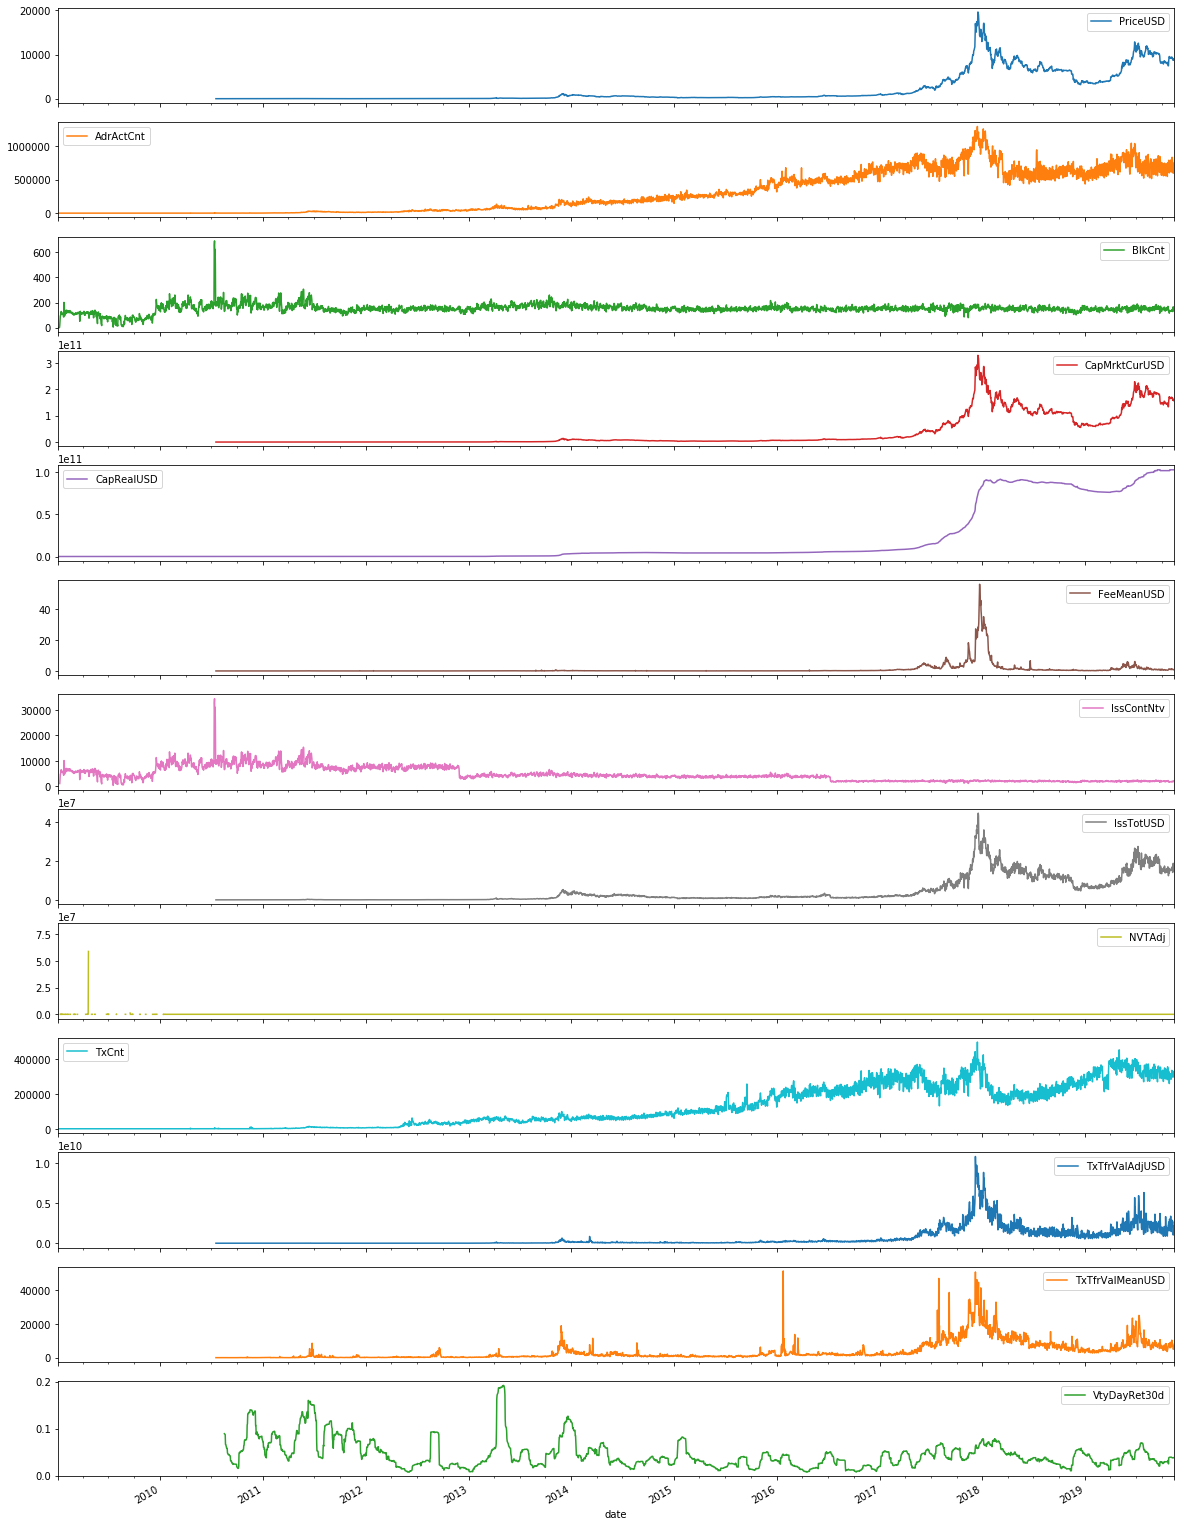

In [23]:
varplots = ['PriceUSD','AdrActCnt','BlkCnt','CapMrktCurUSD','CapRealUSD','FeeMeanUSD','IssContNtv','IssTotUSD','NVTAdj','TxCnt','TxTfrValAdjUSD','TxTfrValMeanUSD','VtyDayRet30d']
axes = btcdata[varplots].plot(figsize=(20,30),subplots=True)

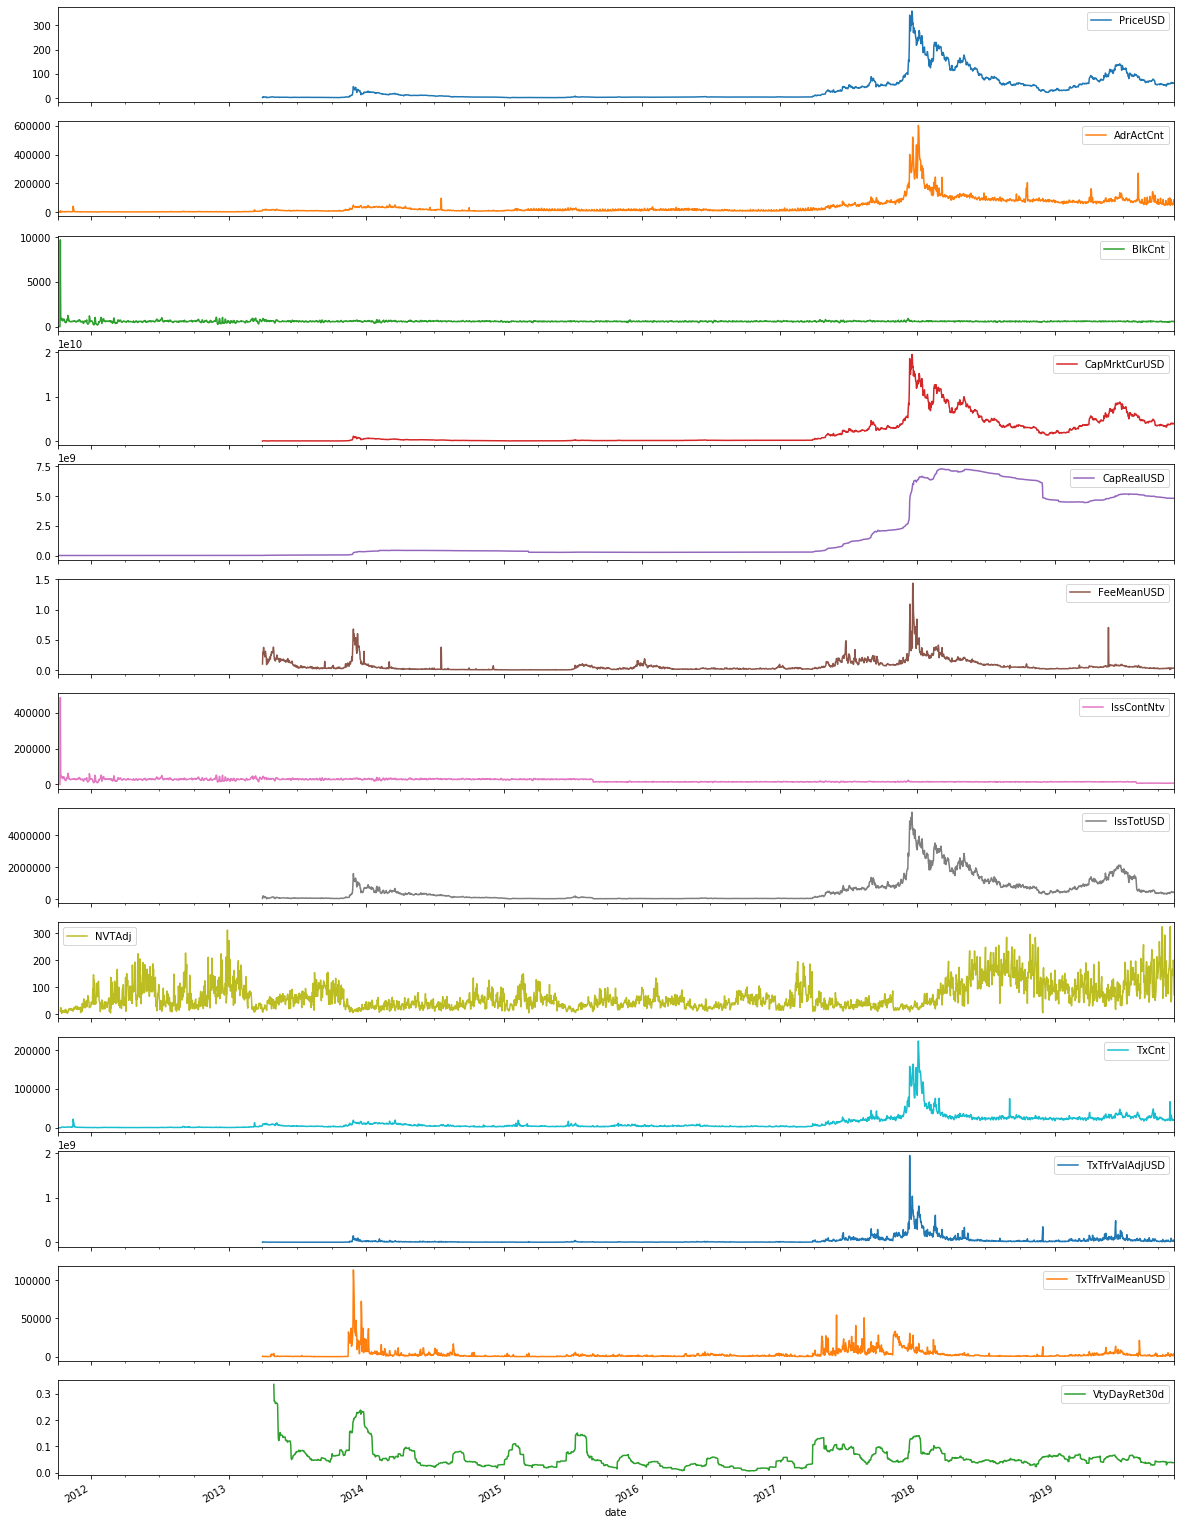

In [22]:
varplots = ['PriceUSD','AdrActCnt','BlkCnt','CapMrktCurUSD','CapRealUSD','FeeMeanUSD','IssContNtv','IssTotUSD','NVTAdj','TxCnt','TxTfrValAdjUSD','TxTfrValMeanUSD','VtyDayRet30d']
axes = ltcdata[varplots].plot(figsize=(20,30),subplots=True)

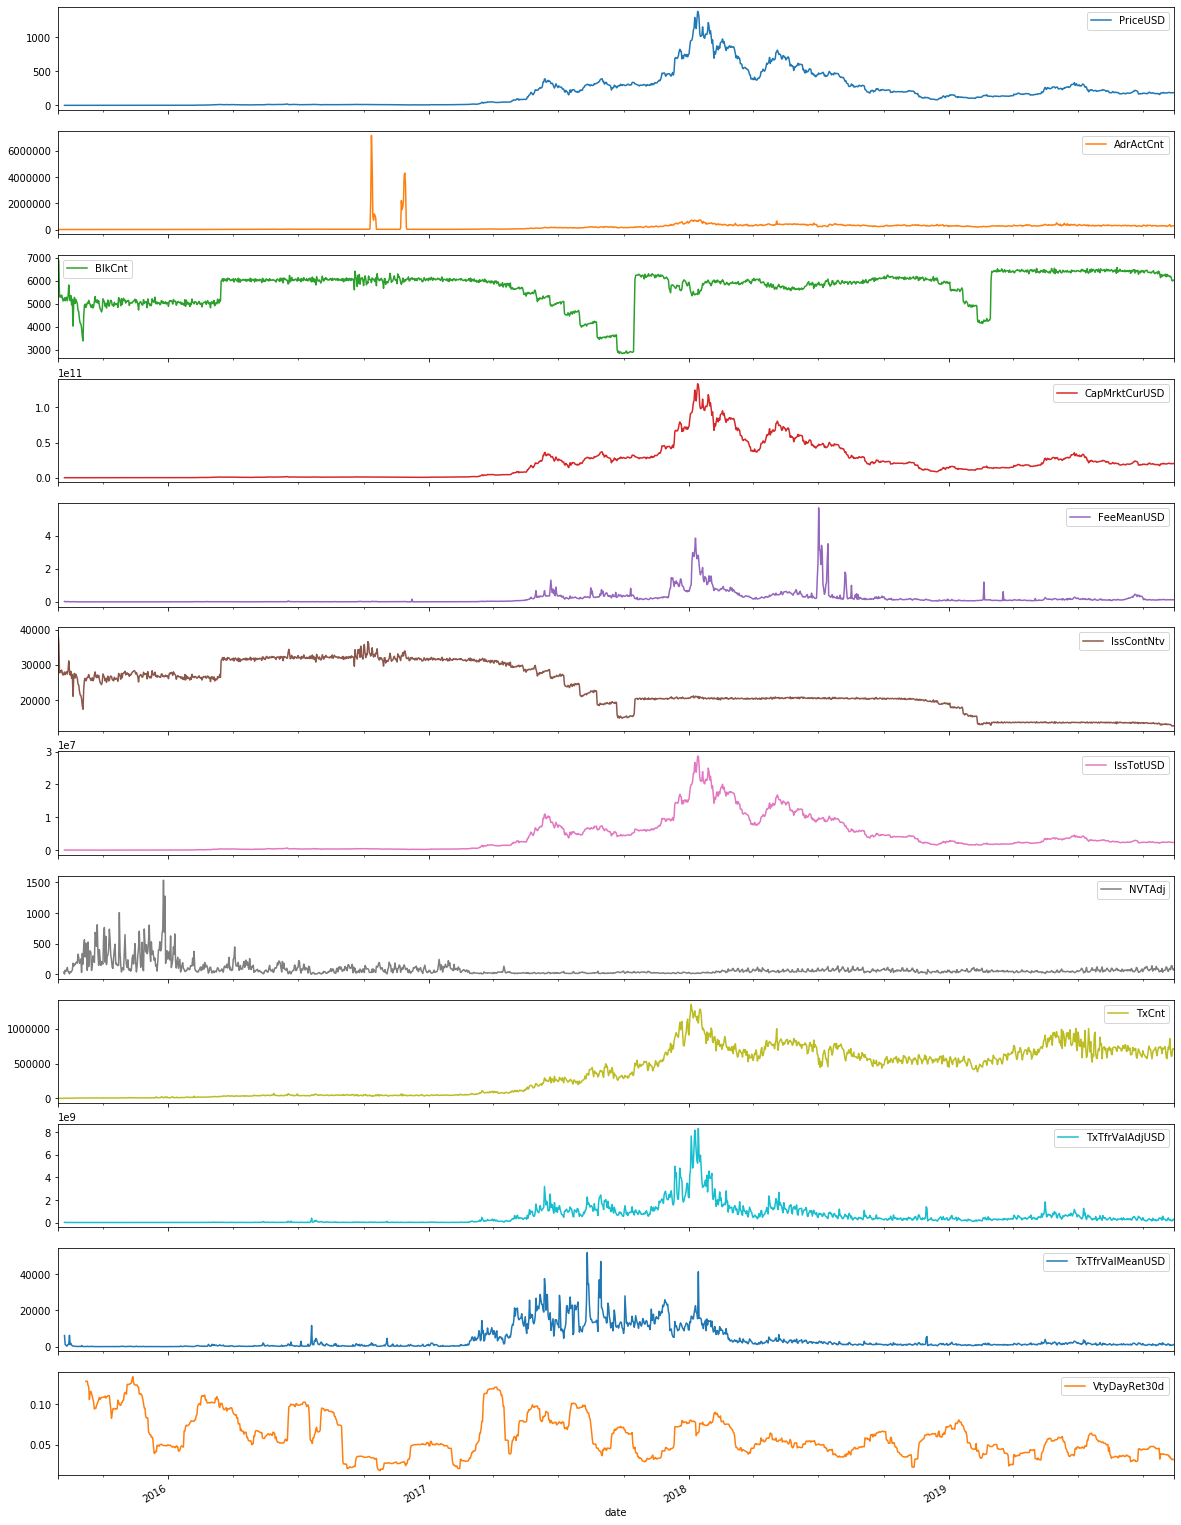

In [21]:
varplots = ['PriceUSD','AdrActCnt','BlkCnt','CapMrktCurUSD','FeeMeanUSD','IssContNtv','IssTotUSD','NVTAdj','TxCnt','TxTfrValAdjUSD','TxTfrValMeanUSD','VtyDayRet30d']
axes = ethdata[varplots].plot(figsize=(20,30),subplots=True)